# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Muhammad Azmi Alauddin
- **Email:** mc227d5y1203@student.devacademy.id
- **ID Dicoding:** MC227D5Y1203

## Menentukan Pertanyaan Bisnis

- Bagaimana tingkat penggunaan sewa sepeda berdasarkan musim?
- Bagaimana perbandingan penggunaan sewa sepeda pada tahun 2011 & 2012?
- Pada jam berapa jumlah penyewa sepeda paling banyak?

## Import Semua Packages/Library yang Digunakan

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter

## Data Wrangling

### Gathering Data

In [114]:
file_path_day = "day.csv"

day_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "lakshmi25npathi/bike-sharing-dataset",
  file_path_day
)

day_df.head()

<ipython-input-114-853f9ba06c7b>:3: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  day_df = kagglehub.load_dataset(


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [115]:
file_path_hour = "hour.csv"

hour_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "lakshmi25npathi/bike-sharing-dataset",
  file_path_hour
)

hour_df.head()

<ipython-input-115-ea9d323b0803>:3: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  hour_df = kagglehub.load_dataset(


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mendapatkan 2 data yang sama, hanya dibedakan menjadi per hari dan per jam
- Ada beberapa faktor yang terdata dalam data ini, seperti faktor hari kerja/ hari libur dan faktor cuaca/keadaan

### Assessing Data

In [116]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [117]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [118]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [119]:
print("Jumlah diplikasi pada day_df: ", day_df.duplicated().sum())

Jumlah diplikasi pada day_df:  0


In [120]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [121]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [122]:
print("Jumlah duplikasi pada hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi pada hour_df:  0


In [123]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- data day.csv dan hour.csv tidak memiliki missing value
- keduanya bebas dari data duplikasi
- tipe pada kolom tanggal 'dteday' masih berupa object

### Cleaning Data

In [124]:
# Membersihkan data day_df
datetime_columns = ['dteday']

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [125]:
# Membersihkan data hour_df
datetime_columns = ['dteday']

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Mengubah format tipe 'dteday' menjadi format tanggal
- semua data dalam format angka (integer/float), namun sejatinya ada beberapa data yang merupakan data kategorikal namun, berdasarkan angka

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Demografi pengguna berdasarkan season
day_df.groupby('season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': 'mean'
})

,casual,registered,cnt
season,,,
1,334.928177,2269.204420,2604.132597
2,1106.097826,3886.233696,4992.331522
3,1202.611702,4441.691489,5644.303191
4,729.112360,3999.050562,4728.162921


In [ ]:
# Demografi pengguna berdasarkan bulan
day_df.groupby('mnth').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['mean', 'min', 'max']
})

casual   registered          cnt            
             mean         mean         mean   min   max
mnth                                                   
1      194.225806  1982.112903  2176.338710   431  4521
2      262.508772  2392.789474  2655.298246  1005  5062
3      716.838710  2975.419355  3692.258065   605  8362
4     1013.366667  3471.533333  4484.900000   795  7460
5     1214.274194  4135.500000  5349.774194  2633  8294
6     1231.766667  4540.600000  5772.366667  3767  8120
7     1260.596774  4303.080645  5563.677419  3285  8173
8     1161.919355  4502.500000  5664.419355  1115  7865
9     1172.050000  4594.466667  5766.516667  1842  8714
10     963.870968  4235.354839  5199.225806    22  8156
11     610.050000  3637.133333  4247.183333  1495  6852
12     349.887097  3053.919355  3403.806452   441  6606

In [75]:
# Demografi pengguna berdasarkan wheatersit
day_df.groupby('weathersit').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['mean', 'min', 'max']
})

casual   registered          cnt           
                  mean         mean         mean  min   max
weathersit                                                 
1           964.030238  3912.755940  4876.786177  431  8714
2           687.352227  3348.510121  4035.862348  605  8362
3           185.476190  1617.809524  1803.285714   22  4639

In [126]:
# Rata-rata jumlah pengguna berdasarkan season
season_name = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].map(season_name)

users_in_season = day_df.groupby(by='season').cnt.mean().sort_values().reset_index()
users_in_season

,season,cnt
0,Spring,2604.132597
1,Winter,4728.162921
2,Summer,4992.331522
3,Fall,5644.303191


In [ ]:
# Hari dengan penyewa sepeda terbanyak dan tersedikit
day_df.sort_values(by='cnt', ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605
25,26,2011-01-26,1,0,1,0,3,1,3,0.217500,0.203600,0.862500,0.293850,34,472,506
725,726,2012-12-26,1,1,12,0,3,1,3,0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,1,0,1,0,4,1,1,0.195000,0.219700,0.687500,0.113837,15,416,431


**Insight:**
- Rata-rata pengguna terbanyak berdasarkan bulan yaitu di bulan ke-6, bulan Juni
- Hari dengan total penyewa terbanyak ada di tanggal 15 September 2012 dengan total 8714 penyewa
- Hari dengan total penyewa paling sedikit ada di tanggal 29 Oktober 2012 dengan total 22 penyewa

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tingkat penggunaan sewa sepeda berdasarkan musim?

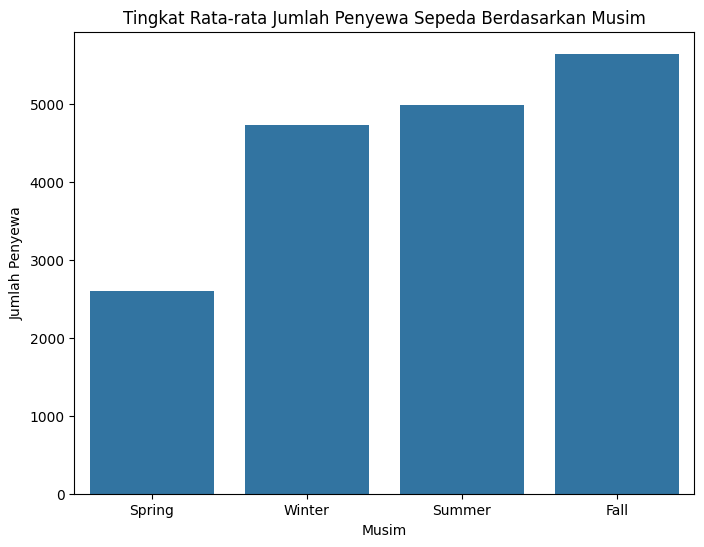

In [131]:
# plot tingkat rata-rata penyewa sepeda berdasarkan musim
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=users_in_season)
plt.title('Tingkat Rata-rata Jumlah Penyewa Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa')
plt.show()

### Pertanyaan 2: Bagaimana perbandingan penggunaan sewa sepeda pada tahun 2011 & 2012?

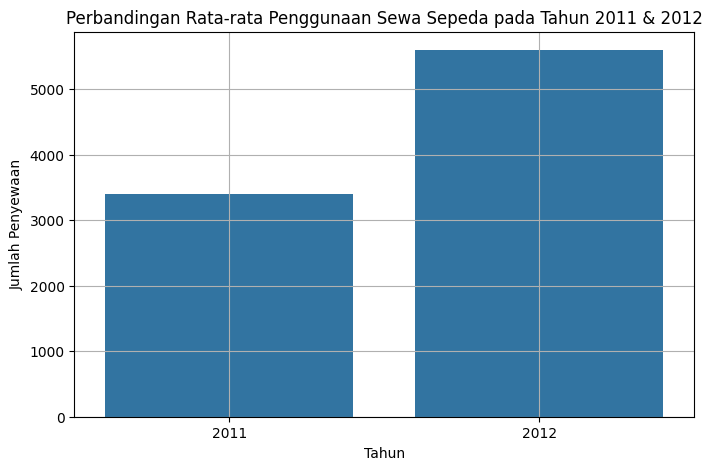

In [127]:
# Mapping year ke nama tahun
day_df["year"] = day_df["yr"].map({0: "2011", 1: "2012"})

users_in_year = day_df.groupby("year")["cnt"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="year", y="cnt", data=users_in_year)

plt.title("Perbandingan Rata-rata Penggunaan Sewa Sepeda pada Tahun 2011 & 2012")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Penyewaan")
plt.grid(True)

plt.show()


### Pertanyaan 3: Pada jam berapa jumlah penyewa sepeda paling banyak?

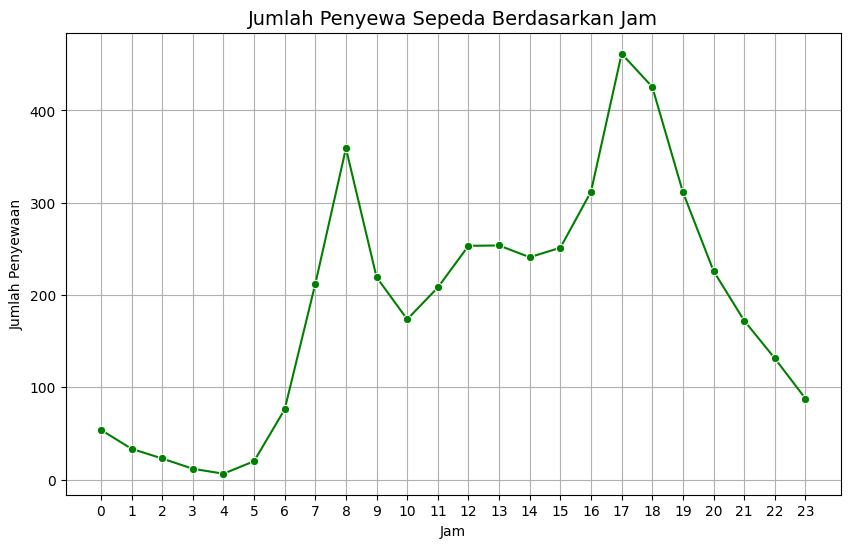

In [ ]:
# Agregasi jumlah penyewaan berdasarkan jam
users_in_hour = hour_df.groupby("hr")["cnt"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x="hr", y="cnt", data=users_in_hour, marker="o", linestyle="-", color='g')

plt.title("Jumlah Penyewa Sepeda Berdasarkan Jam", fontsize=14)
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(range(0, 24))
plt.grid(True)

plt.show()


**Insight:**
- Rata-rata penggunaan sewa sepeda mengalami kenaikan penyewa pada jam 5.00 pagi sampai puncak di jam 8.00 pagi, kemudian menurun dan mengalami kenaikan signifikan lagi pada jam 15.00 dengan puncak di jam 17.00  
- Pada tahun 2012 mengalami kenaikan penggunaan sewa sepeda dibanding tahun 2011
- Rata-rata jumlah penyewa sepeda paling banyak di musim gugur (Fall), dan rata-rata jumlah penyewa sepeda paling sedikit di musim semi (spring)

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: pada musim semi orang-orang tidak banyak yang menyewa sepeda, dan pada musim gugur banyak orang-orang yang menyewa sepeda
- Conclution pertanyaan 2: Perbandingan pada penyewa sepeda tahun 2012 mengalami kenaikan di banding pada tahun 2011
- Conclusion pertanyaan 3: Rata-rata penyewa sepeda mengalami kenaikan pada jam 5.00 pagi sampai puncak di jam 8.00 pagi, kemudian menurun dan mengalami kenaikan signifikan lagi pada jam 15.00 dengan puncak di jam 17.00. Dari hasil ini disimpulkan orang-orang banyak menyewa sepeda saat di waktu-waktu berangkat jam kerja dan meningkat pula di sore hari pada saat di waktu-waktu pulang jam kerja

In [133]:
all_df = pd.concat([day_df, hour_df], ignore_index=True)
all_df.to_csv("data_project1.csv", index=False)